In [1]:
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('cancer_gene_expression.csv')
df

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,2.933384,0.0,1.683921,0.0,0.0,0.0,0.0,0.635336,1.252839,...,9.985842,9.469967,4.225275,6.955336,11.722206,7.309940,10.986119,6.396848,1.252839,BRCA
797,0.0,0.000000,0.0,2.772625,0.0,0.0,0.0,0.0,0.534759,3.761764,...,12.334681,8.157327,1.482797,6.758183,11.403838,9.005347,11.012045,5.386625,1.697640,COAD
798,0.0,0.408277,0.0,1.854754,0.0,0.0,0.0,0.0,0.000000,0.986520,...,11.671992,8.859616,6.393828,6.427115,11.596586,7.454127,10.718533,5.507417,1.398131,BRCA
799,0.0,0.639232,0.0,3.226971,0.0,0.0,0.0,0.0,1.921322,0.639232,...,12.237087,5.753976,4.192478,6.614875,11.183245,7.544261,10.649382,5.282158,0.639232,BRCA


In [3]:
df.columns[-1]

'Cancer_Type'

In [5]:
datanul=df.isnull().sum()
g = [i for i in datanul if i>0]
print('columns with missing values:%d'%len(g))

columns with missing values:0


In [6]:
df['Cancer_Type'].value_counts()

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

In [14]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [15]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_
classes = np.unique(y)
nclasses=np.unique(y).shape[0]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

In [17]:
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_val=min_max_scaler.fit_transform(X_val)
X_test=min_max_scaler.transform(X_test)

In [18]:
#define model
model = Sequential()

#hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

#hidden layer 2
model.add(Dense(20, activation='relu'))

#output layer
model.add(Dense(nclasses, activation='softmax'))

#define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [19]:
#fit the model to the training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)

Epoch 1/200

16/16 [==============================] - 5s 72ms/step - loss: 1.4729 - sparse_categorical_accuracy: 0.4121 - val_loss: 1.2073 - val_sparse_categorical_accuracy: 0.5469
Epoch 2/200
16/16 [==============================] - 0s 21ms/step - loss: 1.0108 - sparse_categorical_accuracy: 0.6465 - val_loss: 0.8084 - val_sparse_categorical_accuracy: 0.8125
Epoch 3/200
16/16 [==============================] - 0s 21ms/step - loss: 0.6971 - sparse_categorical_accuracy: 0.8262 - val_loss: 0.5111 - val_sparse_categorical_accuracy: 0.8672
Epoch 4/200
16/16 [==============================] - 0s 14ms/step - loss: 0.4501 - sparse_categorical_accuracy: 0.9043 - val_loss: 0.3871 - val_sparse_categorical_accuracy: 0.8828
Epoch 5/200
16/16 [==============================] - 0s 29ms/step - loss: 0.3078 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.2392 - val_sparse_categorical_accuracy: 0.9766
Epoch 6/200
16/16 [==============================] - 0s 26ms/step - loss: 0.2177 - sparse_categoric

16/16 [==============================] - 0s 19ms/step - loss: 0.0018 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0364 - val_sparse_categorical_accuracy: 0.9922
Epoch 46/200
16/16 [==============================] - 0s 27ms/step - loss: 0.0017 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0365 - val_sparse_categorical_accuracy: 0.9922
Epoch 47/200
16/16 [==============================] - 0s 27ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0354 - val_sparse_categorical_accuracy: 0.9922
Epoch 48/200
16/16 [==============================] - 0s 22ms/step - loss: 0.0015 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0359 - val_sparse_categorical_accuracy: 0.9922
Epoch 49/200
16/16 [==============================] - 0s 25ms/step - loss: 0.0015 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0347 - val_sparse_categorical_accuracy: 0.9922
Epoch 50/200
16/16 [==============================] - 0s 24ms/step - loss: 0.0014 - sparse_categorical_accur

Epoch 90/200
16/16 [==============================] - 0s 31ms/step - loss: 4.1232e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0359 - val_sparse_categorical_accuracy: 0.9922
Epoch 91/200
16/16 [==============================] - 0s 25ms/step - loss: 4.0236e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0359 - val_sparse_categorical_accuracy: 0.9922
Epoch 92/200
16/16 [==============================] - 0s 30ms/step - loss: 3.9356e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0359 - val_sparse_categorical_accuracy: 0.9922
Epoch 93/200
16/16 [==============================] - 0s 31ms/step - loss: 3.8444e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0360 - val_sparse_categorical_accuracy: 0.9922
Epoch 94/200
16/16 [==============================] - 0s 29ms/step - loss: 3.7499e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0360 - val_sparse_categorical_accuracy: 0.9922
Epoch 95/200
16/16 [==============================] - 0s 24ms/step - loss: 

16/16 [==============================] - 0s 32ms/step - loss: 1.6971e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_sparse_categorical_accuracy: 0.9922
Epoch 135/200
16/16 [==============================] - 0s 28ms/step - loss: 1.6672e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0367 - val_sparse_categorical_accuracy: 0.9922
Epoch 136/200
16/16 [==============================] - 0s 25ms/step - loss: 1.6420e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0372 - val_sparse_categorical_accuracy: 0.9922
Epoch 137/200
16/16 [==============================] - 0s 16ms/step - loss: 1.6142e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0364 - val_sparse_categorical_accuracy: 0.9922
Epoch 138/200
16/16 [==============================] - 1s 40ms/step - loss: 1.5850e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0368 - val_sparse_categorical_accuracy: 0.9922
Epoch 139/200
16/16 [==============================] - 0s 21ms/step - loss: 1.5581e-

16/16 [==============================] - 0s 27ms/step - loss: 8.5639e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0373 - val_sparse_categorical_accuracy: 0.9922
Epoch 179/200
16/16 [==============================] - 0s 19ms/step - loss: 8.4421e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0375 - val_sparse_categorical_accuracy: 0.9922
Epoch 180/200
16/16 [==============================] - 0s 22ms/step - loss: 8.3379e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0372 - val_sparse_categorical_accuracy: 0.9922
Epoch 181/200
16/16 [==============================] - 0s 21ms/step - loss: 8.2150e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0373 - val_sparse_categorical_accuracy: 0.9922
Epoch 182/200
16/16 [==============================] - 0s 24ms/step - loss: 8.1282e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0376 - val_sparse_categorical_accuracy: 0.9922
Epoch 183/200
16/16 [==============================] - 0s 26ms/step - loss: 7.9905e-

In [20]:
predictions = model.predict(X_test)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

6/6 [==============================] - 0s 10ms/step


In [21]:
for index,entry in enumerate(predictions[0:20,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:3 ,actual:3
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:0 ,actual:0
predicted:1 ,actual:1
predicted:1 ,actual:1
predicted:4 ,actual:4


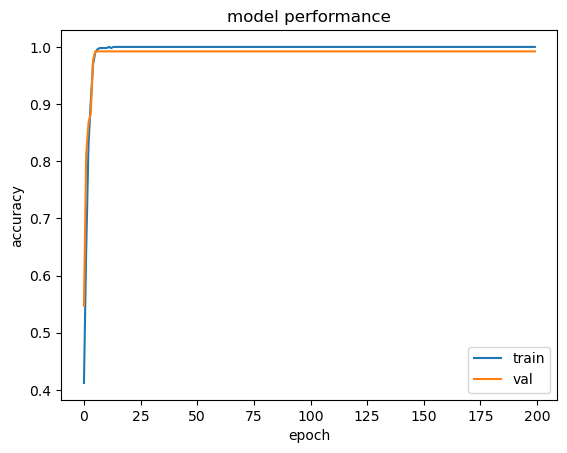

In [22]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

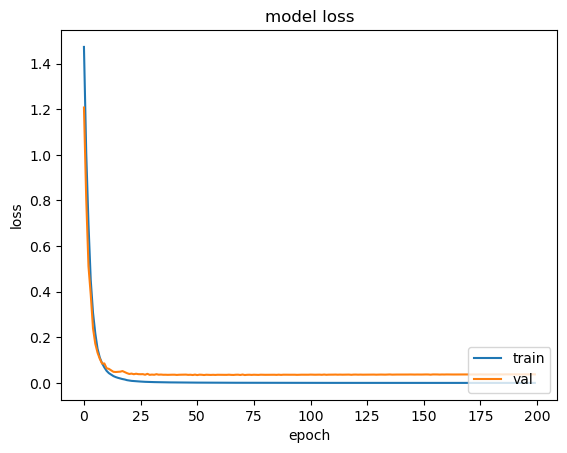

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()